# Univariate Linear Regression Practical 1

### Aim: To solve for the best fit line to the data points given below

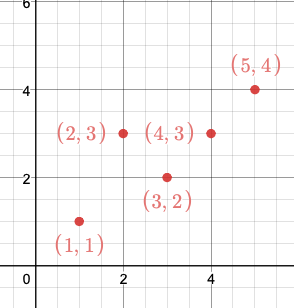

## Notation:
$m$ *= Number of training examples*

$x$ *= Input Variable/Features*

$y$ *= Output Variable/ Target Variable*

$(x^{i},y^{i})$ *= $i^{th}$training example*


## Complete Dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame([
    (1,1),
    (2,3),
    (3,2),
    (4,3),
    (5,4)
],
columns = ['x','y'])

df.head()

,x,y
0,1,1
1,2,3
2,3,2
3,4,3
4,5,4


# Mathematical Interpretation

We will feed our training data to a *Learning Algorithm* and which will output a function that we're going to call *hypothesis* $h(x)$

The job of the hypothesis function is: *Given a value of x, find an estimated value of y which matched the pattern in the training set*

#### Define a  *hyphothesis function* 

$h_{\theta}(x) = \theta_{0}+\theta_{1}x$

$\theta_{0}$ and $\theta_{1}$ are called parameters of our learning model. They are generally expressed as $\theta_{i}$ which refers to the $i^{th}$ parameter but in our case we only have 2 parameters.

***AIM :*** We want to find those values of $\theta_{0}$ and $\theta_{1}$ for which our hypothesis function $h_{\theta}(x)$ is close to $y$ for our training examples $(x^{i},y^{i})$

For this, we will define our problem as a Optimization Problem where we will minimize the mean squared differences of the out estimate predicted by the hypothesis function and the actual given output

*Minimize :* $\dfrac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x^{i})-y^{i})^{2}$ 

where $h_{\theta}(x^{i}) = \theta_{0}+\theta_{1}x^{i}$

We will define the above mean squared differences as a cost function $J(\theta_{0},\theta_{1})$ as

$J(\theta_{0},\theta_{1})$ = $\dfrac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x^{i})-y^{i})^{2}$ 

To minimize the cost function $J(\theta_{0},\theta_{1})$ we will use an algorithm called *Gradient Descent*

First, we are going to choose the values of $\theta_{0}$ and $\theta_{1}$ randomly.


$\theta_{0} = 0$

$\theta_{1} = 0$



Then we will keep changing this values of $\theta_{0}$ and $\theta_{1}$ until we reach a Global Minimum

To do this we will use the following algorithm of the gradient descent



$repeat$ $until$ $convergence$ *{*

$\theta_{j} := \theta_{j} - \alpha \dfrac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{j}}$

*}*

*where* $\alpha$ *is called the learning rate.* 

And we will do this for all the parameters. 

Since, we have only 2 parameters $\theta_{0}$ and $\theta_{1}$, that means we have to do a simultaneous update of both the parameters $\theta_{0}$ and $\theta_{1}$ after applying the above algorithm to both $\theta_{0}$ and $\theta_{1}$

This means we have to 

$t_{0} := \theta_{0} - \alpha \dfrac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{0}}$ 

$t_{1} := \theta_{1} - \alpha \dfrac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{1}}$ 


$\theta_{0} = t_{0}$

$\theta_{1} = t_{1}$

Now using multivariate calculus we can find out that 

$\dfrac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{0}} = \dfrac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{i})-y^{i})$  




and 

$\dfrac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{1}} = \dfrac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{i})-y^{i})x^{i}$  



*We will know that we have reached a global minimum when the derivative term of gradient descent* $\dfrac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{0}}$ and $\dfrac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{1}}$ will both become zero.

So all we have to do is

$repeat$ $until$ $convergence$ *{*

$t_{0} := \theta_{0} - \alpha \dfrac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{0}}$ 

$t_{1} := \theta_{1} - \alpha \dfrac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{1}}$ 


$\theta_{0} = t_{0}$

$\theta_{1} = t_{1}$


*}*

In [157]:
print(df)

   x  y
0  1  1
1  2  3
2  3  2
3  4  3
4  5  4


In [158]:
t0 = 5
t1 = 1

In [159]:
def hypo(t0, t1, x):
    result = (t0 + t1*x)
    return result

In [160]:
def cost(t0,t1):
    a = t0
    b = t1
    sum = 0
    for index, rows in df.iterrows():
        hyp = hypo(a,b,rows["x"])
        y = rows["y"]
        absError = (hyp - y)**2
        sum = sum+ absError
    totalcost =0.5*(1/len(df))*sum
    return totalcost
    
        

In [161]:
def dTermT0(t0, t1):
    a = t0
    b = t1
    sum = 0
    for index, rows in df.iterrows():
        hyp = hypo(a,b,rows["x"])
        y = rows["y"]
        absError = (hyp - y)
        sum = sum+ absError
    totalcost =(1/len(df))*sum
    return totalcost
    
    

In [162]:
def dTermT1(t0, t1):
    a = t0
    b = t1
    sum = 0
    for index, rows in df.iterrows():
        hyp = hypo(a,b,rows["x"])
        y = rows["y"]
        absError = (hyp - y)*(rows['x'])
        sum = sum+ absError
    totalcost =(1/len(df))*sum
    return totalcost

In [163]:
a=0
b=0
lr = 0.1

pcost = cost(a,b)
ncost = cost(a,b)
while ncost<=pcost:
    pcost = cost(a,b)
    x = a - (dTermT0(a,b))*lr
    y = b - (dTermT1(a,b))*lr
    a = x
    b = y
    ncost = cost(a,b)
    
print("The parameters should be: theta0 = ",a," theta1 = ", b)





The parameters should be: theta0 =  0.7999998905464024  theta1 =  0.6000000303168914


That means that the learning algorithm gave a solution or a hypothesis function like this 

$h(x) = 0.7999 + 0.6000x$

On plotting a graph of this hypothesis function we find that it fits our dataset perfectly

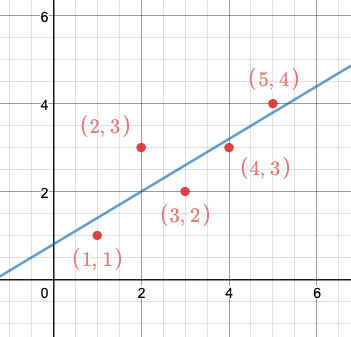

# Important Conclusions

1. It is a unlikely that that learning algorithm will be able to find a set of parameters for which the cost function comes out to be exactly zero. Thus Trying to achieve this in the condition of while loop is not practical and would take forever to calculate and wont provide any answers. A better way is to always check that the new cost that comes out on gradient descent is lesser than pervious cost and stop wherever it starts to overshoot.


2. The learning algorithm does highlt depend upton the learning rate and improper selection of learning rate will lead to errors. Always check the learning rate by checking it again and again and changing values.

# Example 2

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame([
    (1,1),
    (2,1.75),
    (3,1.5),
    (4,1.4),
    (5,1.7),
    (6,1.9),
    (7,1.98)
],
columns = ['x','y'])

df

,x,y
0,1,1.00
1,2,1.75
2,3,1.50
3,4,1.40
4,5,1.70
5,6,1.90
6,7,1.98


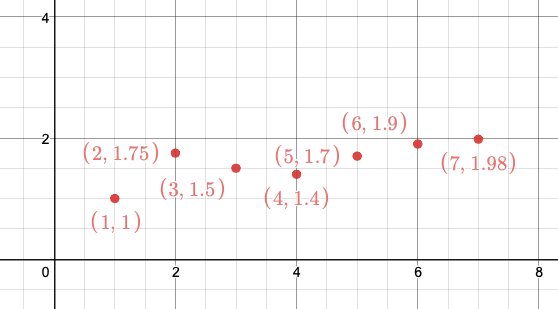

Running the same algorithm again

In [7]:
a=0
b=0
lr = 0.01

def hypo(t0, t1, x):
    result = (t0 + t1*x)
    return result

def cost(t0,t1):
    a = t0
    b = t1
    sum = 0
    for index, rows in df.iterrows():
        hyp = hypo(a,b,rows["x"])
        y = rows["y"]
        absError = (hyp - y)**2
        sum = sum+ absError
    totalcost =0.5*(1/len(df))*sum
    return totalcost
    
def dTermT0(t0, t1):
    a = t0
    b = t1
    sum = 0
    for index, rows in df.iterrows():
        hyp = hypo(a,b,rows["x"])
        y = rows["y"]
        absError = (hyp - y)
        sum = sum+ absError
    totalcost =(1/len(df))*sum
    return totalcost

def dTermT1(t0, t1):
    a = t0
    b = t1
    sum = 0
    for index, rows in df.iterrows():
        hyp = hypo(a,b,rows["x"])
        y = rows["y"]
        absError = (hyp - y)*(rows['x'])
        sum = sum+ absError
    totalcost =(1/len(df))*sum
    return totalcost

pcost = cost(a,b)
ncost = cost(a,b)
while ncost<=pcost:
    pcost = cost(a,b)
    x = a - (dTermT0(a,b))*lr
    y = b - (dTermT1(a,b))*lr
    a = x
    b = y
    ncost = cost(a,b)
    
print("The parameters should be: theta0 = ",a," theta1 = ", b)





The parameters should be: theta0 =  1.1128569582660377  theta1 =  0.12285718013365814


This is what the algorithm predicts

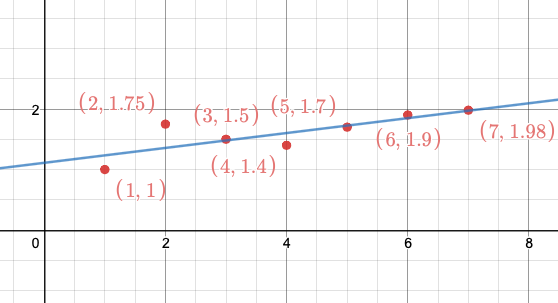